In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


# **Data Preparation**

In [64]:
# Read Data 
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [65]:
# Data Dimension
df.shape

(100000, 9)

In [66]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The age should be int I will convert it 

In [67]:
# Convert age column to int
df['age']=df['age'].astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


In [69]:
# Statistics Infromation
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [70]:
# Checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

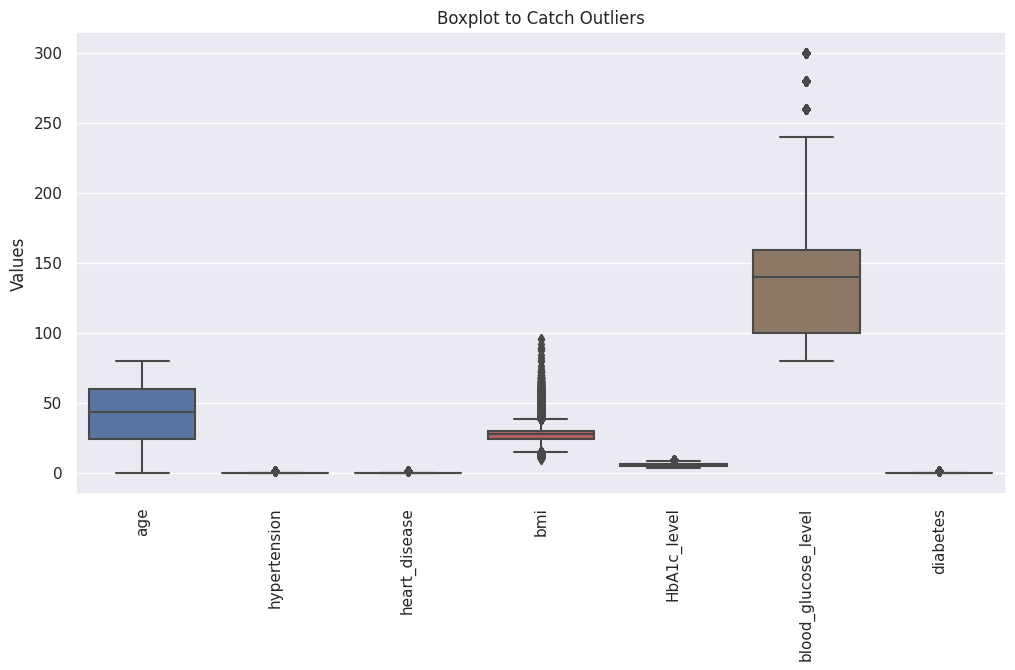

In [71]:
# Check for Outliers 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.title('Boxplot to Catch Outliers')
plt.show()

In [72]:
# IQR technique

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate quartiles and IQR for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for considering a point as an outlier
k = 1.5
outliers = ((numeric_columns < (Q1 - k * IQR)) | (numeric_columns > (Q3 + k * IQR))).any(axis=1)

# Display rows without outliers
df_outliers = df[~outliers]

In [73]:
print(f'The Number of original rows: {df.shape[0]}')
print(f'The Number of original columns: {df.shape[1]}')

print(f'\nThe Number of cleaned rows: {df_outliers.shape[0]}')
print(f'The Number of cleaned columns: {df_outliers.shape[1]}')

print(f'\nThe number of outliers records that dropped is: {df.shape[0] - df_outliers.shape[0]}')

The Number of original rows: 100000
The Number of original columns: 9

The Number of cleaned rows: 79025
The Number of cleaned columns: 9

The number of outliers records that dropped is: 20975


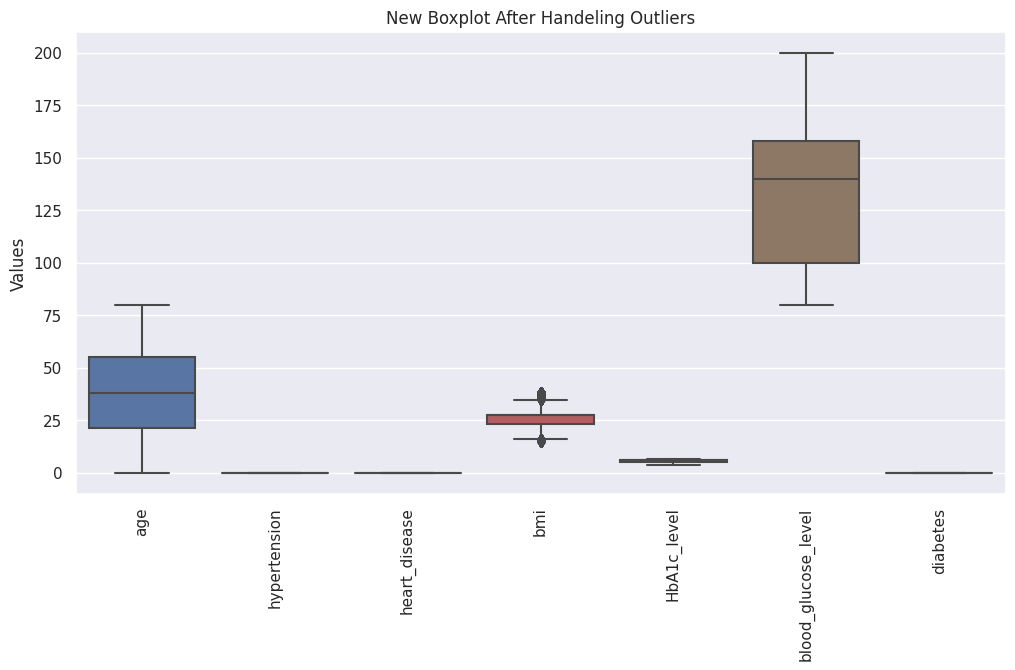

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_outliers)
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.title('New Boxplot After Handeling Outliers')
plt.show()

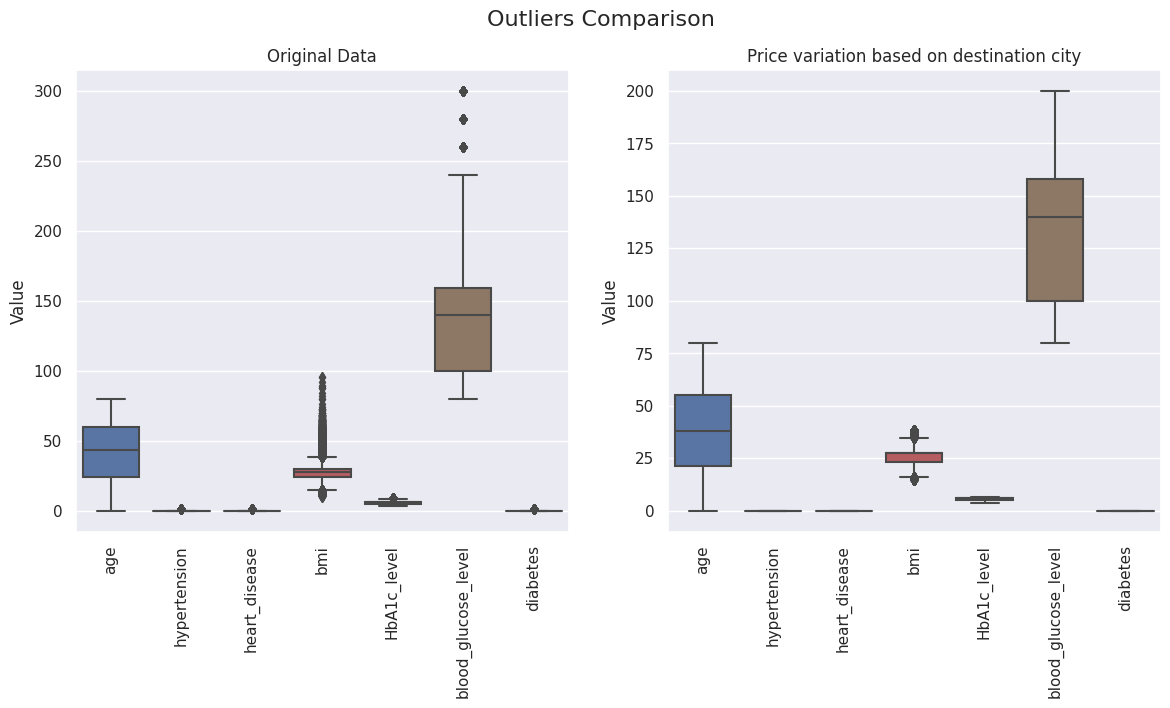

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for the original DataFrame (df)
sns.boxplot(data=df, ax=axes[0])
axes[0].set(title='Original Data', ylabel='Value')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Boxplot for the DataFrame without outliers (df_outliers)
sns.boxplot(data=df_outliers, ax=axes[1])
axes[1].set(title='Price variation based on destination city', ylabel='Value')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotate x-axis labels

plt.suptitle('Outliers Comparison', fontsize=16)

plt.show()

The difference is notable in using the IQR technique to handle outliers.

**Encoding categorical variables**

In [76]:
df_outliers['smoking_history'].value_counts()

smoking_history
No Info        31007
never          27166
current         7068
former          5951
not current     4964
ever            2869
Name: count, dtype: int64

there are so many similar meanings and values we will categorize them again.

In [77]:
# Define a dictionary to map existing categories to new ones
smoking_mapping = {
    'never': 'non-smoker',
    'No Info': 'non-smoker', # My approach here if there is no info I decided to put him in non-smoker category
    'current': 'current',
    'ever': 'past-smoker',
    'former': 'past-smoker',
    'not current': 'past-smoker'
}

# Replace values in the 'smoking_history' column using the mapping dictionary
df['smoking_history'] = df['smoking_history'].replace(smoking_mapping)

In [78]:
df['smoking_history'].value_counts()

smoking_history
non-smoker     70911
past-smoker    19803
current         9286
Name: count, dtype: int64

In [79]:
encoding_columns = df.select_dtypes(include=["object"]).columns

# Perform one-hot encoding using pandas.get_dummies
df_encoded = pd.get_dummies(df, columns=encoding_columns)

# Print information about the encoded DataFrame
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  bool   
 8   gender_Male                  100000 non-null  bool   
 9   gender_Other                 100000 non-null  bool   
 10  smoking_history_current      100000 non-null  bool   
 11  smoking_history_non-smoker   100000 non-null  bool   
 12  smoking_history_past-smoker  100000 non-null  bool   
dtype

In [80]:
# Select boolean columns
boolean_columns = df_encoded.select_dtypes(include=["bool"]).columns

# Convert boolean columns to integer type (True -> 1, False -> 0)
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming df is your DataFrame with features and target column
# df = ...

# Step 1: Handle class imbalance using SMOTE
X = df_encoded.drop(columns=['diabetes'])  # Features
y = df_encoded['diabetes']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only, with sampling_strategy='auto' to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train a classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Step 3: Evaluate the classifier
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27453
           1       0.75      0.74      0.75      2547

    accuracy                           0.96     30000
   macro avg       0.87      0.86      0.86     30000
weighted avg       0.96      0.96      0.96     30000



              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27453
           1       0.75      0.74      0.75      2547

    accuracy                           0.96     30000
   macro avg       0.87      0.86      0.86     30000
weighted avg       0.96      0.96      0.96     30000



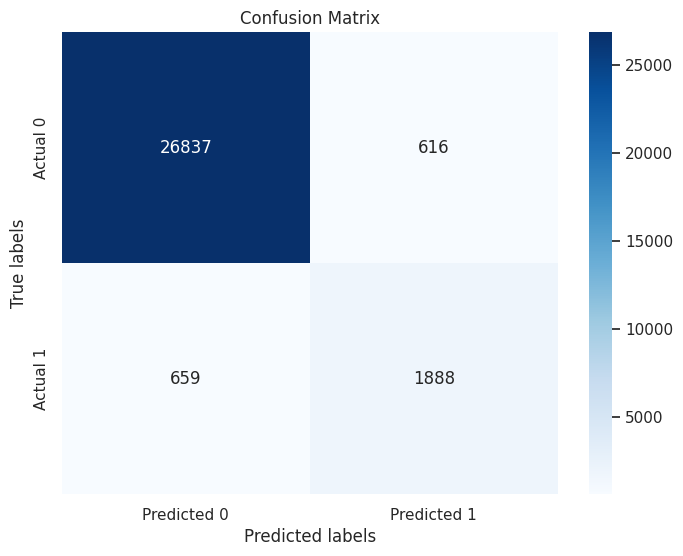

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 3 (continued): Evaluate the classifier
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27453
           1       0.75      0.74      0.75      2547

    accuracy                           0.96     30000
   macro avg       0.87      0.86      0.86     30000
weighted avg       0.96      0.96      0.96     30000

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     27453
           1       0.42      0.91      0.58      2547

    accuracy                           0.89     30000
   macro avg       0.71      0.90      0.75     30000
weighted avg       0.94      0.89      0.90     30000

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     27453
           1       0.42      0.88      0.57      2547

    accuracy                           0.89 

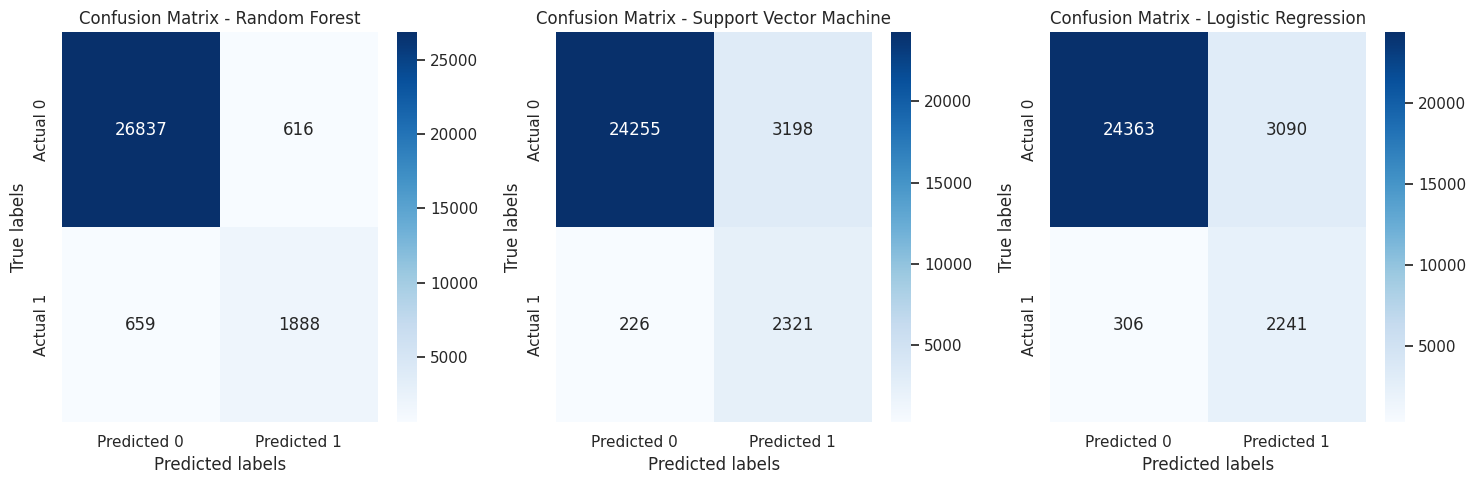

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_encoded is your DataFrame with features and target column
# df_encoded = ...

# Step 1: Handle class imbalance using SMOTE
X = df_encoded.drop(columns=['diabetes'])  # Features
y = df_encoded['diabetes']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only, with sampling_strategy='auto' to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)

# Step 3: Evaluate classifiers and plot confusion matrix
plt.figure(figsize=(15, 5))

for i, (name, clf) in enumerate(classifiers.items(), 1):
    plt.subplot(1, 3, i)
    y_pred = clf.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


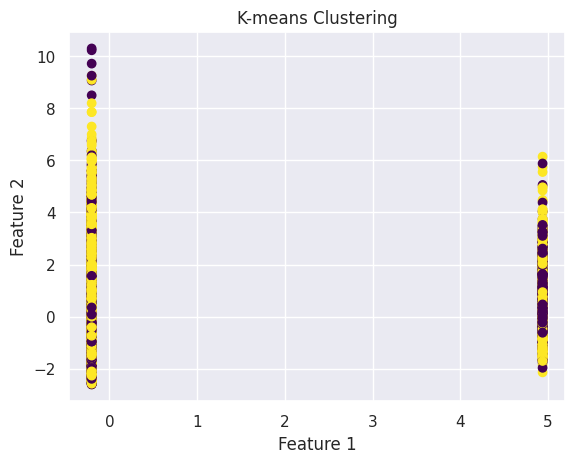

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with features
# df_encoded = ...

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Visualize clusters
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


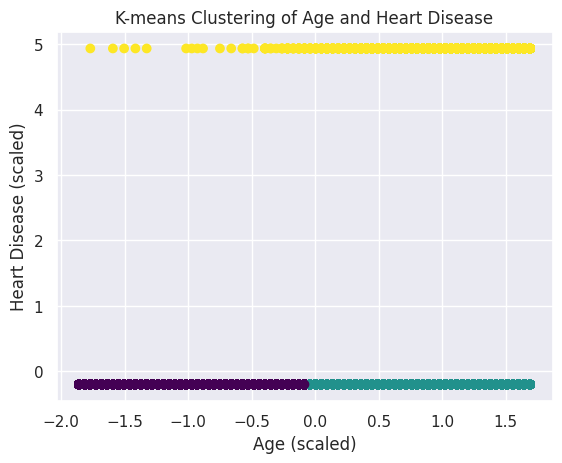

In [94]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with the provided columns
# df_encoded = ...

# Select features for clustering
features = df_encoded[['age', 'heart_disease']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: clustering into 3 groups
clusters = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age (scaled)')
plt.ylabel('Heart Disease (scaled)')
plt.title('K-means Clustering of Age and Heart Disease')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


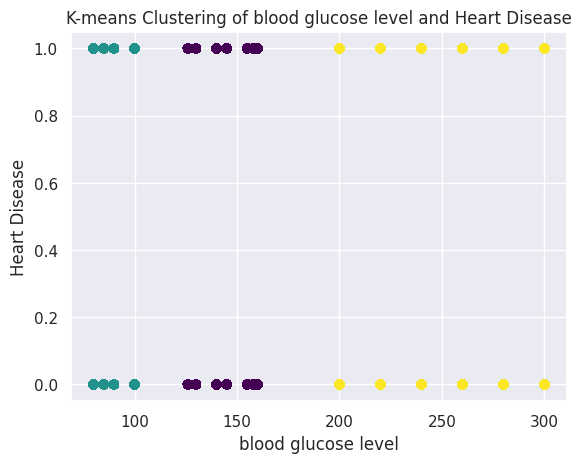

In [100]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with the provided columns
# df_encoded = ...

# Select features for clustering
features = df_encoded[['blood_glucose_level', 'heart_disease']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: clustering into 3 groups
clusters = kmeans.fit_predict(features)

# Visualize clusters
plt.scatter(features['blood_glucose_level'], features['heart_disease'], c=clusters, cmap='viridis')
plt.xlabel('blood glucose level')
plt.ylabel('Heart Disease')
plt.title('K-means Clustering of blood glucose level and Heart Disease')
plt.show()


[4 1 2 ... 4 3 1]
4    32414
2    28565
1    14119
3    14025
0    10877
Name: count, dtype: int64
[0 1 4 ... 0 1 1]
0    32412
4    28567
1    28144
2     8245
3     2632
Name: count, dtype: int64


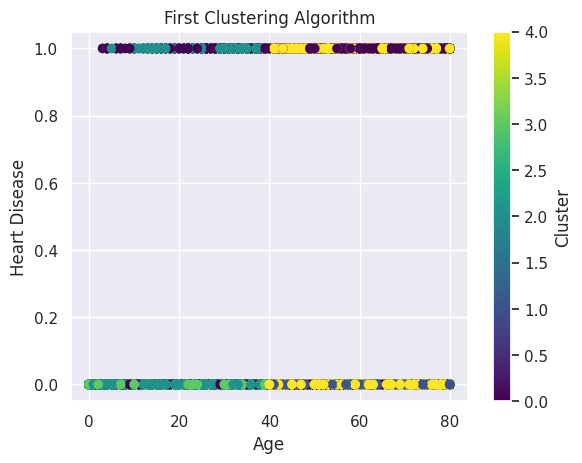

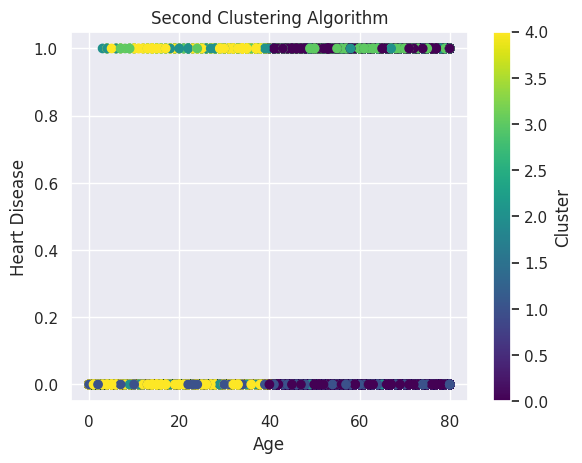

In [107]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming heart_disease is your DataFrame with the provided columns
# heart_disease = ...

# Set seed value
seed_val = 10

# Select features for clustering
features = df_encoded[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
                          'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
                          'gender_Other', 'smoking_history_current', 'smoking_history_non-smoker',
                          'smoking_history_past-smoker']]

# Set seed
import numpy as np
np.random.seed(seed_val)

# Select a number of clusters
k = 5

# Run the k-means algorithms
first_clust = KMeans(n_clusters=k, n_init=1, random_state=seed_val).fit(features)

# How many patients are in each group?
print(first_clust.labels_)
print(pd.Series(first_clust.labels_).value_counts())

# Set the seed
seed_val = 38

# Set seed
np.random.seed(seed_val)

# Run the k-means algorithms
second_clust = KMeans(n_clusters=k, n_init=1, random_state=seed_val).fit(features)

# How many patients are in each group?
print(second_clust.labels_)
print(pd.Series(second_clust.labels_).value_counts())

# Adding cluster assignments to the data
df_encoded['first_clust'] = first_clust.labels_
df_encoded['second_clust'] = second_clust.labels_

# Visualizing the clusters
plt.scatter(df_encoded['age'], df_encoded['diabetes'], c=df_encoded['first_clust'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.title('First Clustering Algorithm')
plt.colorbar(label='Cluster')
plt.show()

plt.scatter(df_encoded['age'], df_encoded['diabetes'], c=df_encoded['second_clust'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.title('Second Clustering Algorithm')
plt.colorbar(label='Cluster')
plt.show()


the limitation here is visualization not very useful in this case

Let's choose the application of **Early Disease Detection** and build a predictive model to identify individuals at risk of developing certain health conditions in the future. We'll focus on predicting the likelihood of developing diabetes based on the available features in the dataset.



In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = df_encoded.drop(columns=['diabetes'])  # Features
y = df_encoded['diabetes']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.92      0.69      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



**Brief Explanation:**

Early disease detection is crucial for timely interventions and preventive measures to reduce the risk of disease progression. In this application, we built a predictive model to identify individuals at risk of developing diabetes based on their health and demographic features.

We used a Random Forest classifier, which is an ensemble learning method known for its robustness and ability to handle complex datasets. The model was trained on a dataset containing features such as age, hypertension, BMI, HbA1c level, blood glucose level, gender, and smoking history.

The dataset was split into training and testing sets to evaluate the model's performance. We standardized the features to ensure they have a mean of 0 and a variance of 1, which is important for many machine learning algorithms.

The model's performance was evaluated using accuracy and the classification report, which includes precision, recall, F1-score, and support for each class.

**Limitations:**

Data Quality: The predictive model's performance heavily relies on the quality and representativeness of the data. If the dataset contains errors, missing values, or biases, it can affect the model's accuracy and reliability.

Feature Selection: The choice of features included in the model can significantly impact its predictive performance. It's essential to select relevant features that have a strong association with the target variable (diabetes) and exclude irrelevant or redundant features.

Imbalanced Data: If the dataset is imbalanced, meaning one class (e.g., individuals with diabetes) is significantly more prevalent than the other class, it can lead to biased model predictions. Techniques such as oversampling, undersampling, or using class weights can be employed to address imbalanced data.

Model Interpretability: Random Forest models, while powerful, are often considered as black-box models, meaning they lack interpretability compared to simpler models like logistic regression. Understanding how the model makes predictions and interpreting its results can be challenging.

Generalization: The model's performance on unseen data (i.e., data not used during training) may vary, and it's essential to assess its generalization capability on different datasets to ensure its reliability in real-world scenarios.





**Another model**

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = df_encoded.drop(columns=['diabetes'])  # Features
y = df_encoded['diabetes']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

